In [1]:
import network as net
from mnist_loader import load_mnist_data, load_test_data, export_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split, KFold

In [2]:
def hyper_param_setting(training_data, valid_data, random_state, net_architecture, **sgd_params):
    main_param = {}
    for key, value in sgd_params.items():
        if (type(value) is list) or \
           (type(value) is tuple) or \
           (type(value) is np.ndarray):
           sgd_params.pop(key)
           main_param.update({key:value})
           print(f"Training by: {key}")
           break

    recreate_sgd_params = [{**sgd_params, key:value} for value in \
        list(main_param.values())[0]]

    results = []
    nets = []
    for params in recreate_sgd_params:
        nn = net.Network(net_architecture, random_state=random_state)
        res = nn.SGD(training_data=training_data, evaluation_data=valid_data, **params)
        results.append(res)
        nets.append(net)

    return results, list(main_param.items())[0], nets

In [3]:
def comparing_hyper_params(hyper_param, accuracy_and_cost_results, figsize=(10, 5)):
    hp = hyper_param[0]
    values = hyper_param[1]
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    for acc, cf in accuracy_and_cost_results:
        ax1.plot(acc)
        ax2.plot(cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        ax.legend([f"{hp}={value}" for value in values])
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    plt.show()

In [4]:
train, valid, test = load_mnist_data()

In [5]:
def visualisation(acc, cf, figsize=(10, 5)):
    color_cf = None
    if type(acc[0]) != list:
        acc = [acc]
        cf = [cf]
        color_cf = "orange" 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    epochs = len(acc[0])
    for acc_i, cf_i in zip(acc, cf):
        ax1.plot(range(1, epochs+1), np.array(acc_i)*100)
        ax2.plot(range(1, epochs+1), cf_i, color=color_cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    # Доп
    ax1.set_ylim([90, 100])

    plt.show()

In [6]:
EPOCHS = 30
RS = None

start = time.time()
netw = net.Network([784, 30, 10], random_state=RS)
result = netw.SGD(train, .5, EPOCHS, 10, 5., evaluation_data=test,
                                    monitor_evaluation_accuracy=True,
                                    monitor_evaluation_cost=True, 
                                    monitor_training_accuracy=True, 
                                    monitor_training_cost=True)
print("%s seconds" % (time.time()-start))

# netw.SGD(train, 2.714, 30, 30)
# export_data("last_ver.csv", netw.predict(test))

42000
Epoch 1 training complete
 evaluation data
    | Accuracy: 93.342857 
    | Cost:     0.707709
 training data
    | Accuracy: 94.226190
    | Cost:     0.486288

Epoch 2 training complete
 evaluation data
    | Accuracy: 93.885714 
    | Cost:     0.753708
 training data
    | Accuracy: 94.911905
    | Cost:     0.476026

Epoch 3 training complete
 evaluation data
    | Accuracy: 94.242857 
    | Cost:     0.758110
 training data
    | Accuracy: 95.354762
    | Cost:     0.448927

Epoch 4 training complete
 evaluation data
    | Accuracy: 95.035714 
    | Cost:     0.726707
 training data
    | Accuracy: 96.283333
    | Cost:     0.401173

Epoch 5 training complete
 evaluation data
    | Accuracy: 95.150000 
    | Cost:     0.732371
 training data
    | Accuracy: 96.433333
    | Cost:     0.395495

Epoch 6 training complete
 evaluation data
    | Accuracy: 94.742857 
    | Cost:     0.773482
 training data
    | Accuracy: 95.904762
    | Cost:     0.435151

Epoch 7 training compl

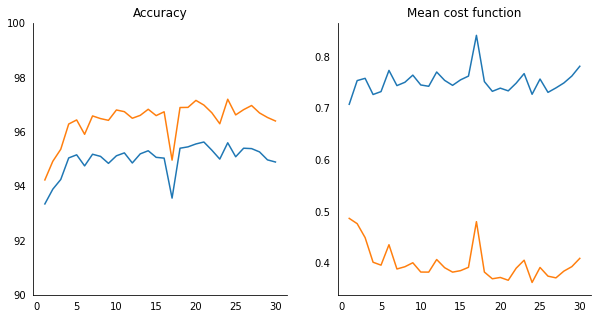

In [7]:
acc, cf, acc_t, cf_t = result
visualisation([acc, acc_t], [cf, cf_t])

In [8]:
res = hyper_param_setting(
    training_data=train, 
    valid_data=valid, 
    random_state=None,
    net_architecture=[784, 100, 10],

    # SGD params 
    eta=0.1, 
    mini_batch_size=10, 
    lmbda=[0.1, 4.2], 
    epochs=30,
    monitor_evaluation_cost=True, 
    )
comparing_hyper_params(res[1], res[0])

Training by: lmbda
42000
Epoch 1 training complete
 evaluation data
    | Accuracy: 92.121429 
    | Cost:     0.528500

Epoch 2 training complete
 evaluation data
    | Accuracy: 93.842857 
    | Cost:     0.414064

Epoch 3 training complete
 evaluation data
    | Accuracy: 94.764286 
    | Cost:     0.347556

Epoch 4 training complete
 evaluation data
    | Accuracy: 95.228571 
    | Cost:     0.319654



KeyboardInterrupt: 

In [ ]:
net01, net42= res[2]
print(net01.evaluate(test))

In [9]:
(-np.array(acc)+np.array(acc_t)).mean()*100

1.4254761904761908